# AUTOMOTIVE INDUSTRY

Problem to be solved: predict the CO2 emission that would be produced by a car that has not been manufactured yet, given some characterists for that car.

## The dataset

We have downloaded a fuel consumption dataset, **FuelConsumption.csv**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)

These are the columns of the dataset:
- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

### Explore the dataset
Imported Pandas and Numpy library and then open the dataset which is in csv format using the pd.read_csv() method of Pandas. After that, check the first 5 rows of the dataframe.

In [1]:
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_01cc527bb96d4bf4a425a055e527cada = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='b82ZZUzL652upPKrBDIIzVcumAE--dvhoXpzzes8FBFs',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_01cc527bb96d4bf4a425a055e527cada.get_object(Bucket='mlprojectsforvariousindustries-donotdelete-pr-cswviijcwiynz0',Key='FuelConsumption.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body)
#preview of the 5 first rows of the dataframe
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Identify the missing values
Detect if there are any missing values which are being represented by either '?' or blank cell.

In [2]:
flag = False
for i in df.columns.tolist():
    if ('?' in df[i].tolist() or '' in df[i].tolist()):
        flag = True
print(flag)

False


Another way to detect missing values is the **df.isnull()** method. The method returns a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Note that characters such as empty strings '' or numpy.inf are not considered NA values.

In [3]:
tmp = df.isnull()
#preview of the 5 first rows of the temporate dataframe
tmp.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


Now use the **value_counts()** method to to check the frequency of the values in each column.

In [4]:
for i in tmp.columns.tolist():
    print (tmp[i].value_counts())
    print ('')

False    1067
Name: MODELYEAR, dtype: int64

False    1067
Name: MAKE, dtype: int64

False    1067
Name: MODEL, dtype: int64

False    1067
Name: VEHICLECLASS, dtype: int64

False    1067
Name: ENGINESIZE, dtype: int64

False    1067
Name: CYLINDERS, dtype: int64

False    1067
Name: TRANSMISSION, dtype: int64

False    1067
Name: FUELTYPE, dtype: int64

False    1067
Name: FUELCONSUMPTION_CITY, dtype: int64

False    1067
Name: FUELCONSUMPTION_HWY, dtype: int64

False    1067
Name: FUELCONSUMPTION_COMB, dtype: int64

False    1067
Name: FUELCONSUMPTION_COMB_MPG, dtype: int64

False    1067
Name: CO2EMISSIONS, dtype: int64



From the previous result, there was no "True" indication. Therefore our Data is clean.

Now use the **df.info()** method to get the better idea of the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


There are 13 Data Columns(Features), followed by the name of the column, No of entries in it, null values if any and the data type.
For example here in this case we have MODELYEAR as the name of the column, 1067 as the number of non null entries in it, not- null stating there is no entry containing null object, and int64 as the data type of the column MODELYEAR.
Alternatively, use **df.dtypes** method to check out the data type of each column in the dataset.

In [6]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

## Analysis of the data and Visualizations


Use the **df.describe()** method, which computes the basic statistics for all continuous variables.

The result will contain the following things:

- the count or frequency.
- the mean or average.
- the standard deviation (std).
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value



In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Additionly, use the **df.describe()** method with an additional argument in it " include = 'all' " , which computes the basic statistics for all continuous variables as well as some statistics for the categorical variables.

Few additional things will be added:

- The number of unique values (unique)
- The most frequent value (top)
- The frequency of the top element (freq)



In [8]:
df.describe(include = 'all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


### Correlation
A mutual interdependence between two or more things is known as correlation.
Check the Correlation between the continuous variables using the **df.corr()** method. 

In [9]:
tmp = df.corr()
tmp

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


As we see from the above results, the correlation coefficient for all variables is 0.7 or higher, which means there is a linear tendency. We keep that information to apply later Linear Regression algorithms to that dataset.

Now, in this code snippet, we get the names of only those columns whose absolute value is correlated to CO2EMISSIONS by greater than 50%.

In [10]:
imp_cols = tmp[abs(tmp['CO2EMISSIONS']) > 0.5].index.tolist()
imp_cols

['ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

### Heat Map
Draw the heatmap of the important columns below. 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df[imp_cols].corr(),cmap='coolwarm',annot=True)

Now use some Visualization methods to check if some of the continuous values are important. Use the Pairplot to check that.

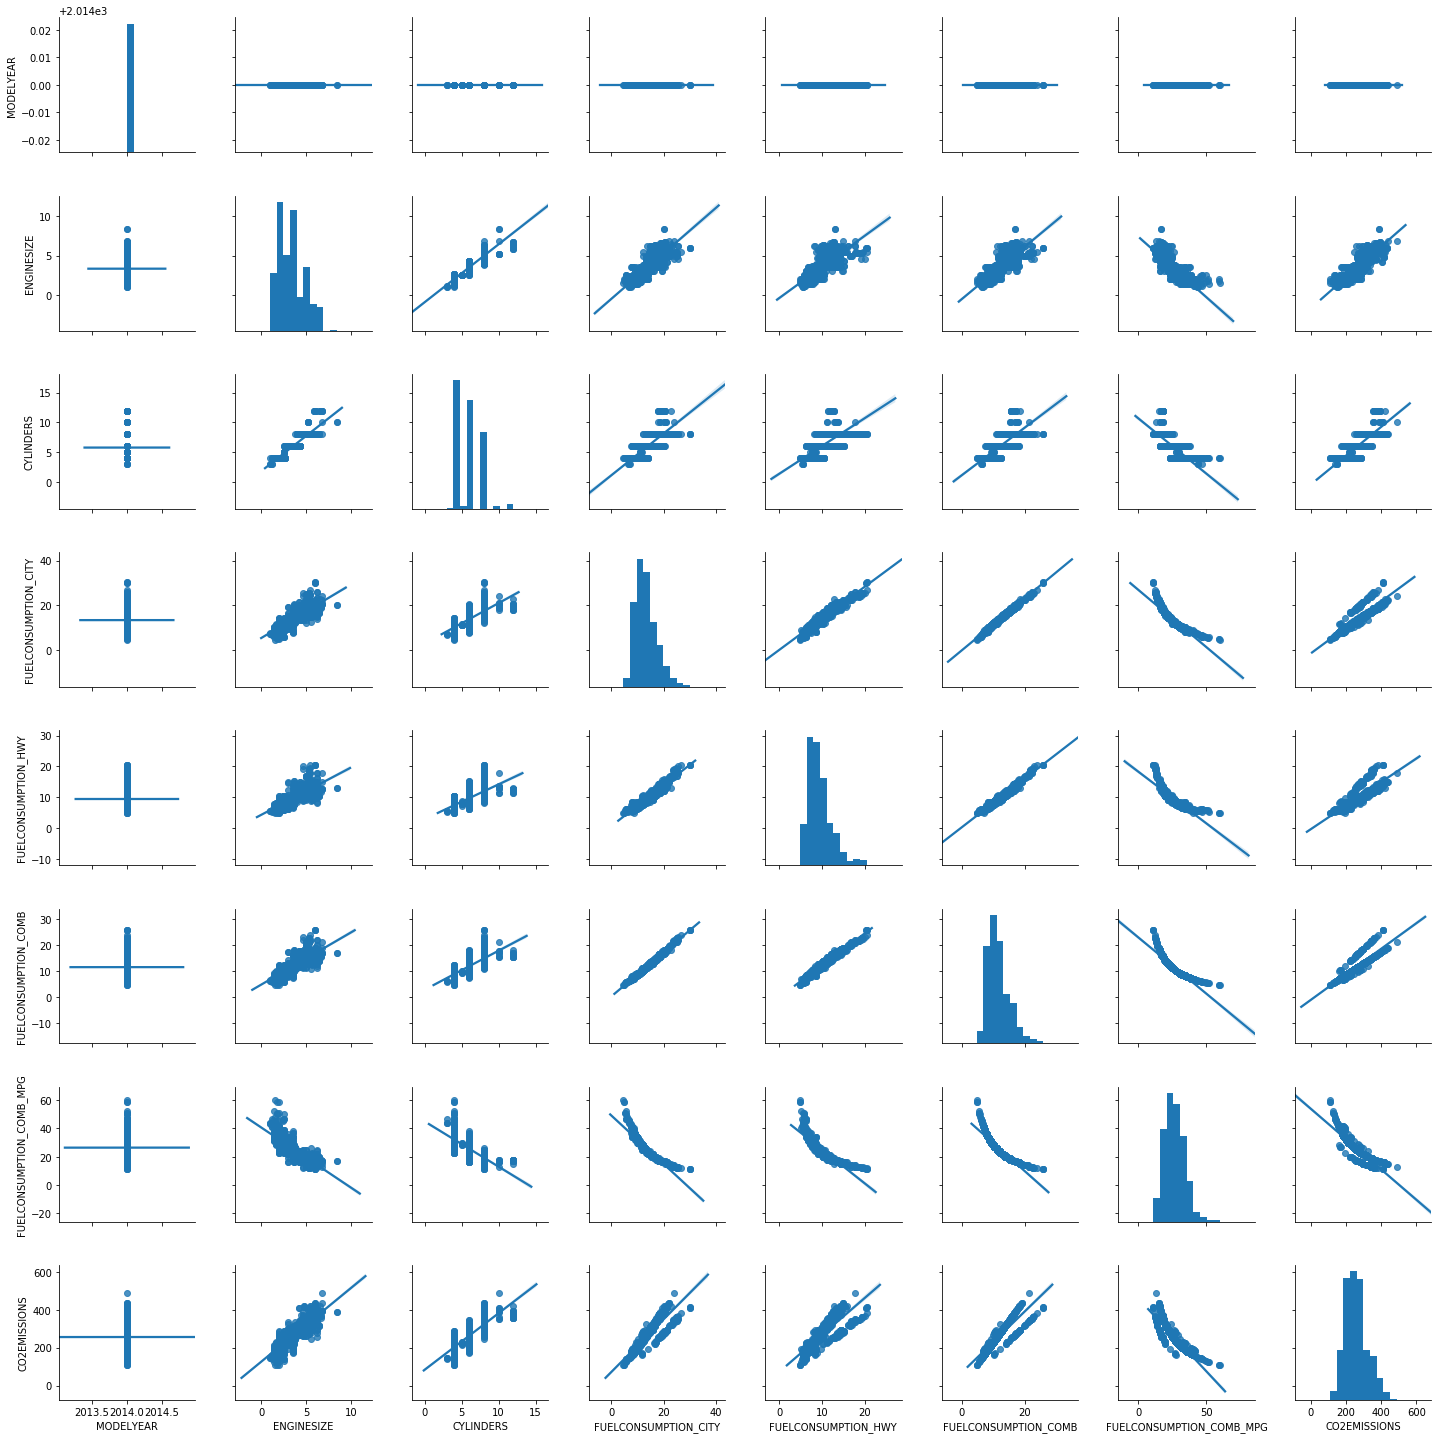

In [12]:
sns.pairplot(df, kind="reg")
plt.show()

Comparing them with the CO2EMISSIONS which is the last row, we can see that:

- 'MODELYEAR' has got no impact on the said column.
- 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY' are having a strong positive correlation.
-  We will 'FUELCONSUMPTION_COMB' into account which is the combination of both highway and city fuel consumption

### Pearson Correlation

Use the **perasonr()** funtion.

In [13]:
from scipy import stats

In [14]:
for i in imp_cols:
    c , p = stats.pearsonr(df[i],df['CO2EMISSIONS'])
    print("correlation coefficient of " + str(i) + " " + str(c)+ " P value : " + str(p))

correlation coefficient of ENGINESIZE 0.8741543683958123 P value : 0.0
correlation coefficient of CYLINDERS 0.8496845920141143 P value : 2.7709372039888274e-298
correlation coefficient of FUELCONSUMPTION_CITY 0.8980385119353926 P value : 0.0
correlation coefficient of FUELCONSUMPTION_HWY 0.8617479448970434 P value : 3.91865563e-316
correlation coefficient of FUELCONSUMPTION_COMB 0.8921285933157566 P value : 0.0
correlation coefficient of FUELCONSUMPTION_COMB_MPG -0.9063942295226132 P value : 0.0
correlation coefficient of CO2EMISSIONS 1.0 P value : 0.0


As we can see all of them are statistically significant so we can go ahead and choose the columns as we discussed above.

Now use the **df._get_numeric_data()** method to get the numeric data into our dataframe.


In [15]:
df = df._get_numeric_data()

For start, use some of the columns and afterwards examine more.

In [16]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Plot each of the features. These histogram plots are part of the previous Pairpart plot. It is an approximate representation of the distribution of numerical or categorical data.

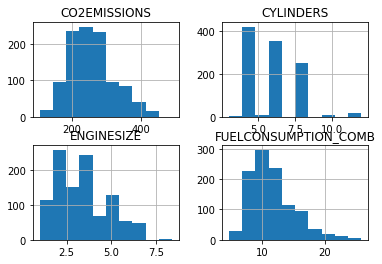

In [17]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Co2Emission, to see how linear is their relation:

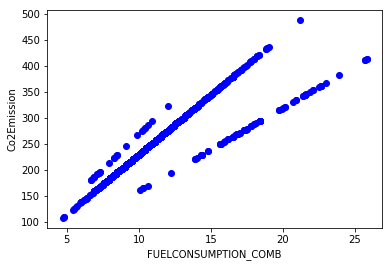

In [18]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Co2Emission")
plt.show()

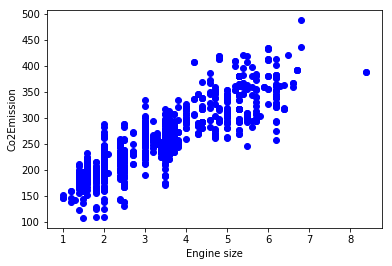

In [19]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Co2Emission")
plt.show()

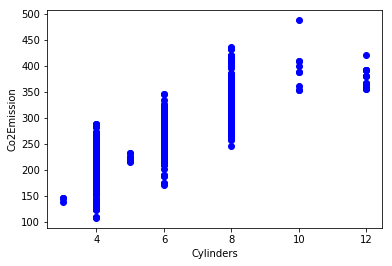

In [20]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Co2Emission")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function:

In [21]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Simple Linear Regression Model
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

Train data distribution

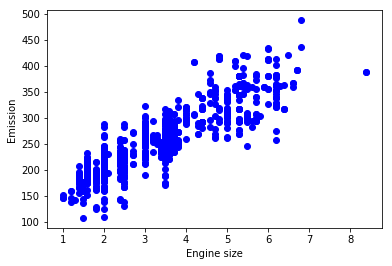

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.

In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.4641443]]
Intercept:  [123.91425231]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.

The fit line is: CO2EMISSIONS = Intercept + Coefficients*ENGINESIZE

#### Plot outputs
We can plot the fit line over the data:

Text(0, 0.5, 'Co2Emission')

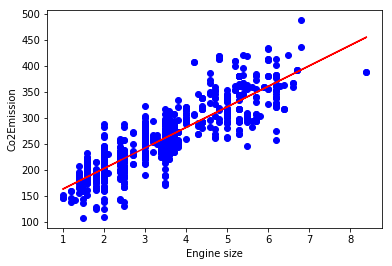

In [24]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Co2Emission")

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [25]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 22.57
Residual sum of squares (MSE): 889.44
R2-score: 0.72


The result isn't that great. So what about considering more features for greating the best line?

Again, lets select some features that we want to use for regression.

In [26]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Histograms of the features not displayed previously.

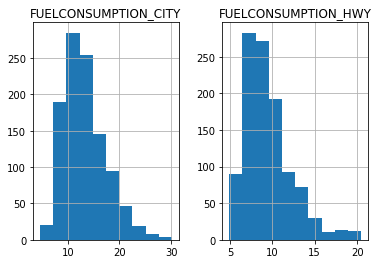

In [27]:
viz = cdf[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
viz.hist()
plt.show()

Now, lets plot these two features vs the Co2Emission, to see how linear is their relation:

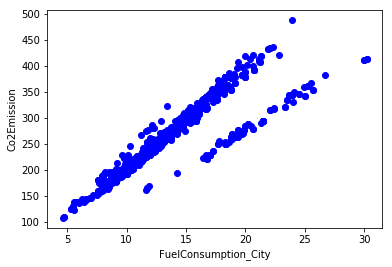

In [28]:
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FuelConsumption_City")
plt.ylabel("Co2Emission")
plt.show()

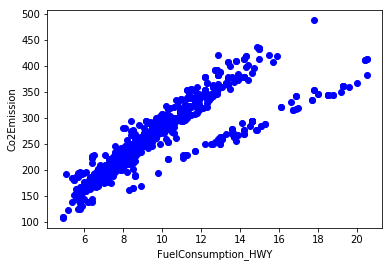

In [29]:
plt.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FuelConsumption_HWY")
plt.ylabel("Co2Emission")
plt.show()

Again, split the dataset into train and test.

In [30]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Multiple Linear Regression Model

In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

In [31]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x_train, y_train)
yhat_train= regr.predict(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[11.42071983  7.15568148  9.44947159]]
Intercept:  [67.06011877]


As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

The calcultion formula in that case is: CO2EMISSION = Intercept + Coef1*ENGINESIZE + Coef2*CYLINDERS + Coef3*FEULCONSUMPTION_COMB

### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
    - Solving the model parameters analytically using closed-form equations
    - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)
    
The problem with this technique is the time complexity of calculating matrix operations as it can take a very long time to finish. When the number of rows in your data set is less than 10,000, you can think of this technique as an option, such as in our case here.

### Evaluation

__explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

In [32]:
yhat_test= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((yhat_test - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Residual sum of squares: 611.12
Variance score: 0.86


Great. We acchived a better score with a Multiple Linear Regression model.
We will now draw a Distribution plot of the two, train and test data.

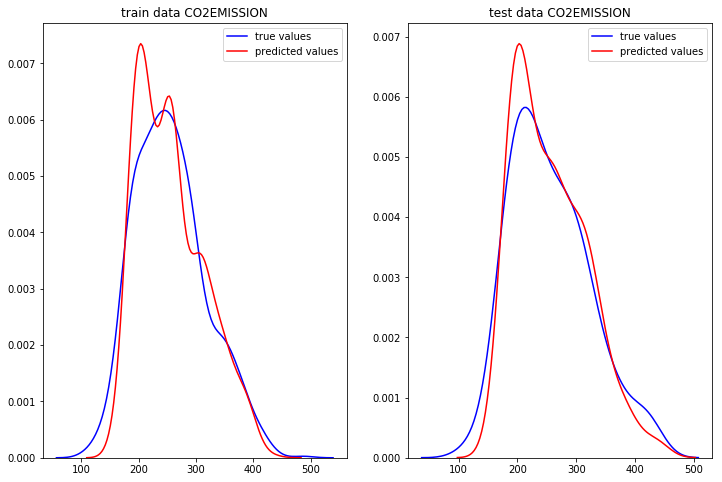

In [33]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
sns.distplot(y_train, color = 'b', label="true values", hist=False, ax = ax1)
sns.distplot(yhat_train, color='r', label="predicted values", hist= False , ax = ax1)
ax1.set_title('train data CO2EMISSION')

sns.distplot(y_test, color = 'b', label="true values", hist=False, ax= ax2)
sns.distplot(yhat_test, color='r', label="predicted values", hist= False , ax = ax2)
ax2.set_title('test data CO2EMISSION')
plt.show()

As we can see in the second plot,the predictions made by our classifier on the test data is not accurate around the range 170-270 as it varies by a greater extent.

Lets play with the features to see if we can acchive even better results.
Use a multiple linear regression with the same dataset but this time use __FUEL CONSUMPTION in CITY__ and 
__FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB. 

In [34]:
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x_train, y_train)
yhat_train= regr.predict(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
yhat_test= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((yhat_test - y_test) ** 2))
print('Variance score: %.2f' % regr.score(x_test, y_test))

Coefficients:  [[11.42730347  6.95604047  5.7557169   3.53463171]]
Intercept:  [67.61159057]
Residual sum of squares: 609.08
Variance score: 0.86


Not much of a difference on the score.
We will now draw a Distribution plot of the two, train and test data.

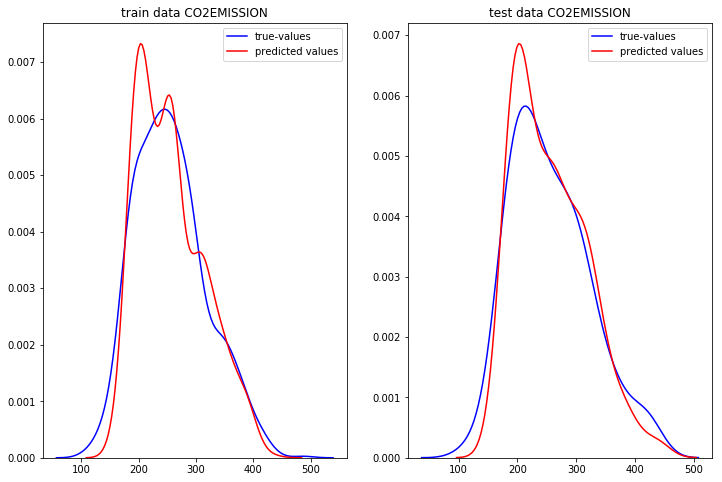

In [35]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
sns.distplot(y_train, color = 'b', label="true-values", hist=False, ax = ax1)
sns.distplot(yhat_train, color='r', label="predicted values", hist= False , ax = ax1)
ax1.set_title('train data CO2EMISSION')

sns.distplot(y_test, color = 'b', label="true-values", hist=False, ax= ax2)
sns.distplot(yhat_test, color='r', label="predicted values", hist= False , ax = ax2)
ax2.set_title('test data CO2EMISSION')
plt.show()

Again, as we can see in the second plot,the predictions made by our classifier on the test data is not accurate around the range 170-270 as it varies by a greater extent.

#### Cross Validation method

Now we will use the **cross_calidation_score** and **cross_validation_predict** to evaluate the accuracy and predict respectively using the cross validation approach.


In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

score_cv = cross_val_score(regr,x_train, y_train, cv = 4)
print("Mean Accuracy of training data using 4 folds :",score_cv.mean())

Mean Accuracy of training data using 4 folds : 0.8379776184333994


In [37]:
score_cv = cross_val_score(regr,x_test, y_test, cv = 4)
print("Mean Accuracy of test data using 4 folds :",score_cv.mean())

Mean Accuracy of test data using 4 folds : 0.8518114761927973


Their corresponding Distribution plots are shown below.

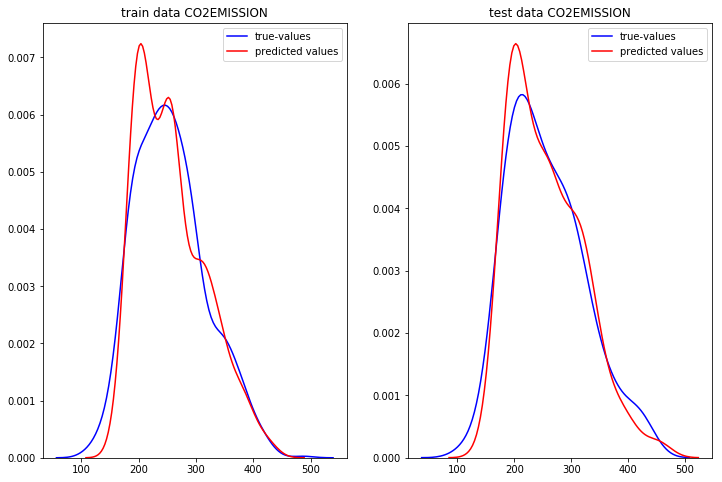

In [38]:
ytest_cv = cross_val_predict(regr,x_test,y_test,cv= 4)
ytrain_cv = cross_val_predict(regr,x_train,y_train,cv =4)

fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
sns.distplot(y_train, color = 'b', label="true-values", hist=False, ax = ax1)
sns.distplot(ytrain_cv, color='r', label="predicted values", hist= False , ax = ax1)
ax1.set_title('train data CO2EMISSION')

sns.distplot(y_test, color = 'b', label="true-values", hist=False, ax= ax2)
sns.distplot(ytest_cv, color='r', label="predicted values", hist= False , ax = ax2)
ax2.set_title('test data CO2EMISSION')
plt.show()

We get the same behavior on results with this validation method.

Now, lets try something different. Could it be a Polynomial Regression problem instead? Let's find out.

## Polynomial Regression Model

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$y = b + \theta_1  x + \theta_2 x^2$

Now, the question is: how we can fit our data on this equation while we have only x values, such as __Engine Size__? 
Well, we can create a few additional features: 1, $x$, and $x^2$.



__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

Lets select some features that we want to use for regression.

In [39]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

In [40]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Build the model

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$y = b + \theta_1  x_1 + \theta_2 x_2$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 



so we can use __LinearRegression()__ function to solve it:

In [42]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         51.72754019 -1.72203618]]
Intercept:  [105.44390353]


As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:

Text(0, 0.5, 'Emission')

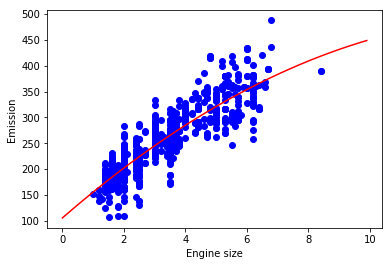

In [43]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluation

In [44]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.35
Residual sum of squares (MSE): 1001.66
R2-score: 0.62


Lets try a Polynomial Regression model of degree three (cubic).

Coefficients:  [[ 0.         35.53639327  2.7150904  -0.36546351]]
Intercept:  [122.68907662]
Mean absolute error: 24.29
Residual sum of squares (MSE): 992.76
R2-score: 0.63


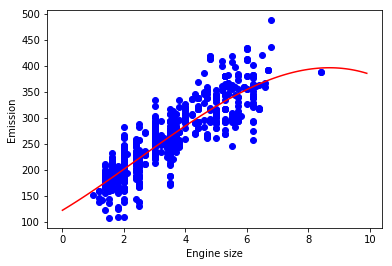

In [45]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )

Between the Polynomial Regression models, the one of degree three is slightly better.

However, we can say with certainty that the **Multiple Linear Regression** fits better for the asked prediction.